In [1]:
from am4pa.linnea import DataManagerLinnea, LinneaConfig
from am4pa.linnea import OperandsSamplerCorner
from am4pa.linnea import MeasurementsMaganer
from va4algs import RankingDataLinnea
from va4algs import RankingModel
from va4algs import SmartMeasurementManager
import pandas as pd
pd.set_option('display.max_rows', None)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### Step 1) Indicate the Expression and the Experiment ID


In [2]:
EXPRESSION_FILE = 'linnea-expressions/gls.py'
EXPERIMENT_ID = 'GLS-ix01'

### Step 2) Sync with backend

In [6]:
SERVER = "login18-1.hpc.itc.rwth-aachen.de"
UNAME = "as641651"
BACK_END_FOLDER = "~/PhD/va4algs-exps/"
FRONT_END_FOLDER = "codes/"
bSLRUM = True

## Measurement parameters
NUM_OPERANDS = 2
MAX_OP_SIZE = 1500
CORNER = 50
P_CORNER = 0.5
SEED = 108
THREADS = '24T'
REPS = 10
RUN_ID = 1

## Rankng Parameters
RANKING_METHOD = 3

In [4]:
linnea_config = LinneaConfig(EXPRESSION_FILE)
linnea_config.set_local_directory("{}{}".format(FRONT_END_FOLDER,EXPERIMENT_ID))
linnea_config.setup_backend_details(server=SERVER,
                                   uname = UNAME,
                                   init_script="~/.analyzer",
                                   backend_root=BACK_END_FOLDER)
linnea_config.connect_backend()

In [5]:
dml = DataManagerLinnea(linnea_config)

{'problem': 'linnea-expressions/gls.py', 'backend': True, 'server': 'login18-1.hpc.itc.rwth-aachen.de', 'uname': 'as641651', 'local_dir': 'codes/GLS-ix01', 'backend_dir': '~/PhD/va4algs-exps/GLS-ix01'}


#### Available Measurements

In [6]:
#dml.measurements_data

### Step 3) Make New Measurements

In [7]:
ops = OperandsSamplerCorner(NUM_OPERANDS,MAX_OP_SIZE,CORNER,P_CORNER,SEED)
mm = MeasurementsMaganer(dml,ops,THREADS)

#### Generate variant codes

In [8]:
## If no new variants are generated, iincrease the num_new_variants
NUM_NEW_VARIANTS = 60
mm.generate_variants_sampler(NUM_NEW_VARIANTS)

In [9]:
#dml.operands_data

#### Submit jobs to backend

In [10]:
mm.measure_variants(reps=REPS,run_id=RUN_ID,bSlrum=bSLRUM)

#### Running jobs

In [11]:
mm.dml.slrum_running_jobs

{'r': []}

#### Pull measurements if completed

In [12]:
mm.check_completed_slrum_jobs()

#### Available measurements data

In [13]:
len(dml.measurements_data[THREADS])

95

### Step 4) Ranking

In [44]:
rm = RankingModel(name='R{}'.format(RANKING_METHOD),method=RANKING_METHOD)
rdl = RankingDataLinnea(dml,rm,THREADS)

In [45]:
rdl.rank3way(update=True)

1000_10
1000_1000
100_100
10_10
10_1000
1204_278
13_1381
13_440
1500_1500
223_47
300_300
35_914
438_48
451_14
48_486
500_500
50_50
70_70
744_530
918_70
71_772
516_1274
38_105
391_221
1308_420
567_113
26_704
873_693
1042_192
843_30
26_446
699_47
973_194
1341_1102
5_1382
997_925
819_7
1176_1327
43_1019
280_41
40_1058
26_1151
403_1080
25_374
1147_364
378_172
153_1256
29_162
1470_13
117_20
344_213
338_206
377_215
363_170
353_132
687_37
672_35
740_50
673_24
673_20
304_247
298_240
337_249
323_204
313_166
728_37
713_35
781_50
714_24
714_20
693_64
635_78
663_59
649_17
717_82
1324_889
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/GLS-ix01/experiments/24T/1324_889/run_times_competing_1.csv codes/GLS-ix01/cluster-data/24T/1324_889
b''
39_131
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/GLS-ix01/experiments/24T/39_131/run_times_competing_1.csv codes/GLS-ix01/cluster-data/24T/39_131
b''
37_313
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/GL

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprec

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/GLS-ix01/experiments/24T/39_131/event_meta_table.csv codes/GLS-ix01/cluster-data/24T/39_131
b''


/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/GLS-ix01/experiments/24T/1128_46/event_meta_table.csv codes/GLS-ix01/cluster-data/24T/1128_46
b''


/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


#### Ranking Data

In [46]:
rdl.data_anomalies

,op_str,num_algs,max-rel-flops,is_anomaly,n_rel0,n_anomalies,risk,time_inc,rel_inc,adj_risk,rel-flops-cutoff
0,1000_10,100,0.002907,False,27,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1000_1000,3,31.884903,False,1,0,0.000000,0.000000,0.000000,0.000000,0.000000
2,100_100,3,31.023290,False,1,0,0.000000,0.000000,0.000000,0.000000,0.000000
3,10_10,3,24.541619,False,1,0,0.000000,0.000000,0.000000,0.000000,0.000000
4,10_1000,100,0.026087,False,13,0,0.000000,0.000000,0.000000,0.000000,0.000000
5,1204_278,100,0.366972,False,9,0,0.000000,0.000000,0.000000,0.000000,0.000000
6,13_1381,100,0.025358,False,88,0,0.000000,0.000000,0.000000,0.000000,0.000000
7,13_440,100,0.073248,False,13,0,0.000000,0.000000,0.000000,0.000000,0.000000
8,1500_1500,3,32.022222,False,1,0,0.000000,0.000000,0.000000,0.000000,0.000000
9,223_47,100,0.343373,False,9,0,0.000000,0.000000,0.000000,0.000000,0.000000


In [47]:
print("Percent Anomalies: {}".format(rdl.percent_anomalies))
print("Average Risk: {}".format(rdl.avg_risk))
print("Average Adjusted Risk: {}".format(rdl.avg_adj_risk))

Percent Anomalies: 0.15789473684210525
Average Risk: 0.09668675963412805
Average Adjusted Risk: 0.021564264349213942


### Save Ranking Data

In [48]:
rdl.save()

#### Data path

In [53]:
rdl.obj_path

'codes/GLS-ix01/ranking-data/rdl_24T_all_R3.pkl'

### Visualize Plot

In [18]:
OP_STR = '699_47'

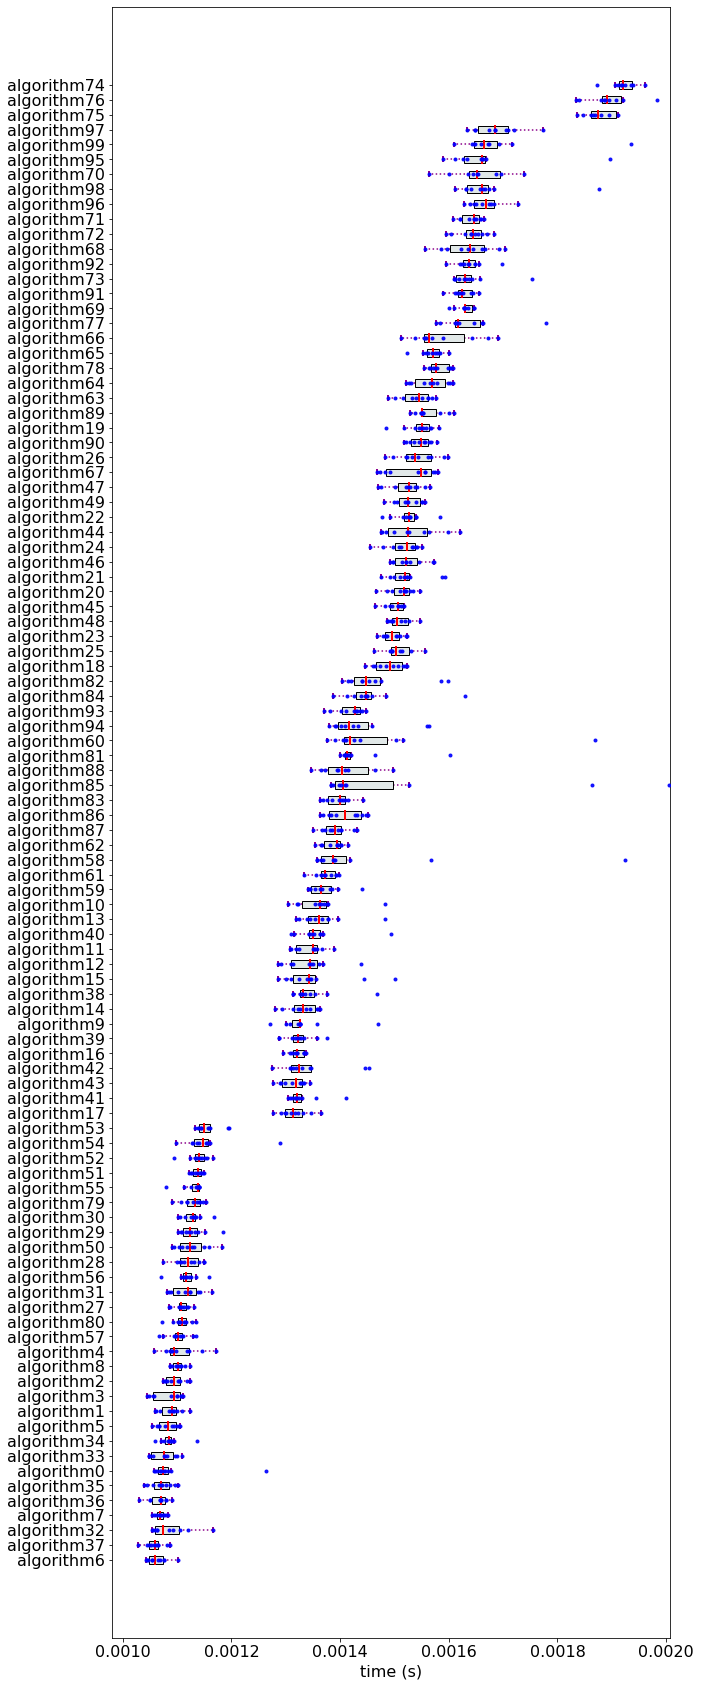

In [19]:
fig = rdl.visualize_box_plots(OP_STR,scale=0.3)

#### Ranks

In [37]:
#rdl.data_ranks[OP_STR]

### Step 5) Smart measurements

In [20]:
rm = RankingModel(name='R{}'.format(RANKING_METHOD),method=RANKING_METHOD)
rdl = RankingDataLinnea(dml,rm,THREADS)

In [30]:
sm = SmartMeasurementManager(rdl,adj_risk_thresh=0.03)

Ranking data from codes/GLS-ix01/ranking-data/rdl_24T_all_R3.pkl has been loaded.


In [31]:
sm.focus

[]

In [32]:
sm.filter_interesting_operands()

,op_str,num_algs,max-rel-flops,is_anomaly,n_rel0,n_anomalies,risk,time_inc,rel_inc,adj_risk,rel-flops-cutoff
60,304_247,100,0.737968,True,9,9,1.000000,0.000401,0.480986,0.480986,0.736185
62,337_249,100,0.733333,True,9,9,1.000000,0.000273,0.339285,0.339285,0.733333
51,338_206,100,0.700000,True,9,9,1.000000,0.000166,0.204306,0.204306,0.700000
45,378_172,100,0.637993,True,9,9,1.000000,0.000104,0.177785,0.177785,0.637993
74,717_82,100,0.122807,True,9,9,1.000000,0.000099,0.067785,0.067785,0.023392
57,740_50,100,0.048485,True,27,18,0.666667,0.000372,0.351967,0.234645,0.000000
31,699_47,100,0.043165,True,27,18,0.666667,0.000326,0.295212,0.196808,0.000000
56,672_35,100,0.033898,True,27,18,0.666667,0.000177,0.202571,0.135047,0.000000
73,649_17,100,0.021234,True,27,25,0.925926,0.000077,0.056578,0.052387,0.000000
86,1128_46,100,0.018484,True,27,3,0.111111,0.001053,0.427004,0.047445,0.000000


In [14]:
sm.history

{'focus': ['378_172',
  '699_47',
  '304_247',
  '337_249',
  '338_206',
  '717_82',
  '740_50',
  '672_35',
  '649_17'],
 'dirty': False}

In [15]:
sm.generate_measure(REPS,RUN_ID,bSLRUM)

Focus: 1128_46
source ~/.analyzer; cd ~/PhD/va4algs-exps/GLS-ix01; python generate-variants-linnea.py 1094 20 --threads=24
['New solution:.............4.85e+08\n', 'New solution:.............4.62e+08\n', 'Nodes:.........................475\n', 'Nodes:.........................826\n', 'Nodes:........................1137\n', 'Nodes:........................1472\n', 'Nodes:........................1802\n', 'Time limit reached.\n', '----------------------------------\n', 'Number of nodes:              1802\n', 'Solution nodes:                 16\n', 'Data:                     6.21e+05\n', 'Best solution:            4.62e+08\n', 'Intensity:                     744\n', 'Number of algorithms:          100\n', 'Generated Variants.\n']
Success: Backend interactive run: Generate variants
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/GLS-ix01/experiments/24T/1094_20/case_table.csv codes/GLS-ix01/cluster-data/24T/1094_20
b''
source ~/.analyzer; cd ~/PhD/va4algs-exps/GLS-ix01; pytho

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/GLS-ix01/experiments/24T/1140_1301/case_table.csv codes/GLS-ix01/cluster-data/24T/1140_1301
b''
source ~/.analyzer; cd ~/PhD/va4algs-exps/GLS-ix01; python generate-variants-linnea.py 1136 1348 --threads=24
['New solution:.............8.92e+09\n', 'New solution:.............6.86e+09\n', 'New solution:.............5.12e+09\n', 'Nodes:.........................546\n', 'New solution:.............5.12e+09\n', 'Nodes:........................1111\n', 'Nodes:........................1624\n', 'Nodes:........................2120\n', 'Nodes:........................2675\n', 'Time limit reached.\n', '----------------------------------\n', 'Number of nodes:              2675\n', 'Solution nodes:                  1\n', 'Data:                     2.18e+06\n', 'Best solution:            5.12e+09\n', 'Intensity:                2.35e+03\n', 'Number of algorithms:          100\n', 'Generated Variants.\n']
Success: Backend interactive run: Gene

[]
Success: Backend interactive run: Generate Measurement script 1
Running Measurements Backend batch
source ~/.analyzer; cd ~/PhD/va4algs-exps/GLS-ix01/experiments/24T/1088_48; sbatch submit.sh julia 'runner_competing_1.jl '
['Submitted batch job 37065594\n']
Success: Backend batch run: Measurements from runner_competing_1.jl
source ~/.analyzer; cd ~/PhD/va4algs-exps/GLS-ix01/experiments/24T/1153_1300; python generate-measurements-script.py --algs algorithm87 algorithm83 algorithm57 algorithm40 algorithm65 algorithm8 algorithm64 algorithm0 algorithm53 algorithm46 algorithm49 algorithm96 algorithm56 algorithm54 algorithm39 algorithm14 algorithm10 algorithm93 algorithm72 algorithm91 algorithm2 algorithm36 algorithm97 algorithm59 algorithm6 algorithm95 algorithm70 algorithm55 algorithm31 algorithm62 algorithm69 algorithm4 algorithm9 algorithm33 algorithm74 algorithm99 algorithm41 algorithm26 algorithm7 algorithm51 algorithm1 algorithm17 algorithm11 algorithm42 algorithm15 algorithm52 alg

[]
Success: Backend interactive run: Generate Measurement script 1
Running Measurements Backend batch
source ~/.analyzer; cd ~/PhD/va4algs-exps/GLS-ix01/experiments/24T/1136_1348; sbatch submit.sh julia 'runner_competing_1.jl '
['Submitted batch job 37065600\n']
Success: Backend batch run: Measurements from runner_competing_1.jl


1

In [16]:
sm.check_slrum_status()

ls ~/PhD/va4algs-exps/GLS-ix01/experiments/24T/1094_20/run_times_competing_1*
ls ~/PhD/va4algs-exps/GLS-ix01/experiments/24T/1162_59/run_times_competing_1*
ls ~/PhD/va4algs-exps/GLS-ix01/experiments/24T/1171_45/run_times_competing_1*
ls ~/PhD/va4algs-exps/GLS-ix01/experiments/24T/1126_35/run_times_competing_1*
ls ~/PhD/va4algs-exps/GLS-ix01/experiments/24T/1088_48/run_times_competing_1*
ls ~/PhD/va4algs-exps/GLS-ix01/experiments/24T/1153_1300/run_times_competing_1*
ls ~/PhD/va4algs-exps/GLS-ix01/experiments/24T/1151_1368/run_times_competing_1*
ls ~/PhD/va4algs-exps/GLS-ix01/experiments/24T/1166_1301/run_times_competing_1*
ls ~/PhD/va4algs-exps/GLS-ix01/experiments/24T/1140_1301/run_times_competing_1*
ls ~/PhD/va4algs-exps/GLS-ix01/experiments/24T/1136_1348/run_times_competing_1*
Completed


1

In [17]:
sm.rank_update()

1000_10
1000_1000
100_100
10_10
10_1000
1204_278
13_1381
13_440
1500_1500
223_47
300_300
35_914
438_48
451_14
48_486
500_500
50_50
70_70
744_530
918_70
71_772
516_1274
38_105
391_221
1308_420
567_113
26_704
873_693
1042_192
843_30
26_446
699_47
973_194
1341_1102
5_1382
997_925
819_7
1176_1327
43_1019
280_41
40_1058
26_1151
403_1080
25_374
1147_364
378_172
153_1256
29_162
1470_13
117_20
344_213
338_206
377_215
363_170
353_132
687_37
672_35
740_50
673_24
673_20
304_247
298_240
337_249
323_204
313_166
728_37
713_35
781_50
714_24
714_20
693_64
635_78
663_59
649_17
717_82
1324_889
39_131
37_313
845_33
711_50
23_477
566_1217
186_848
83_713
1256_725
27_973
1128_46
1071_626
85_40
192_1222
36_514
226_774
281_29
214_34
580_1377
1094_20
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/GLS-ix01/experiments/24T/1094_20/run_times_competing_1.csv codes/GLS-ix01/cluster-data/24T/1094_20
b''
1162_59
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/GLS-ix01/experiments/24

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprec

In [24]:
rdl.data_anomalies

,op_str,num_algs,max-rel-flops,is_anomaly,n_rel0,n_anomalies,risk,time_inc,rel_inc,adj_risk,rel-flops-cutoff
0,1000_10,100,0.002907,False,27,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1000_1000,3,31.884903,False,1,0,0.000000,0.000000,0.000000,0.000000,0.000000
2,100_100,3,31.023290,False,1,0,0.000000,0.000000,0.000000,0.000000,0.000000
3,10_10,3,24.541619,False,1,0,0.000000,0.000000,0.000000,0.000000,0.000000
4,10_1000,100,0.026087,False,13,0,0.000000,0.000000,0.000000,0.000000,0.000000
5,1204_278,100,0.366972,False,9,0,0.000000,0.000000,0.000000,0.000000,0.000000
6,13_1381,100,0.025358,False,88,0,0.000000,0.000000,0.000000,0.000000,0.000000
7,13_440,100,0.073248,False,13,0,0.000000,0.000000,0.000000,0.000000,0.000000
8,1500_1500,3,32.022222,False,1,0,0.000000,0.000000,0.000000,0.000000,0.000000
9,223_47,100,0.343373,False,9,0,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
print("Percent Anomalies: {}".format(rdl.percent_anomalies))
print("Average Risk: {}".format(rdl.avg_risk))
print("Average Adjusted Risk: {}".format(rdl.avg_adj_risk))

Percent Anomalies: 0.14285714285714285
Average Risk: 0.08747849681183015
Average Adjusted Risk: 0.019510524887384043


In [33]:
#sm.adj_risk_thresh = 0.0
sm.filter_interesting_operands()

,op_str,num_algs,max-rel-flops,is_anomaly,n_rel0,n_anomalies,risk,time_inc,rel_inc,adj_risk,rel-flops-cutoff
60,304_247,100,0.737968,True,9,9,1.000000,0.000401,0.480986,0.480986,0.736185
62,337_249,100,0.733333,True,9,9,1.000000,0.000273,0.339285,0.339285,0.733333
51,338_206,100,0.700000,True,9,9,1.000000,0.000166,0.204306,0.204306,0.700000
45,378_172,100,0.637993,True,9,9,1.000000,0.000104,0.177785,0.177785,0.637993
74,717_82,100,0.122807,True,9,9,1.000000,0.000099,0.067785,0.067785,0.023392
57,740_50,100,0.048485,True,27,18,0.666667,0.000372,0.351967,0.234645,0.000000
31,699_47,100,0.043165,True,27,18,0.666667,0.000326,0.295212,0.196808,0.000000
56,672_35,100,0.033898,True,27,18,0.666667,0.000177,0.202571,0.135047,0.000000
73,649_17,100,0.021234,True,27,25,0.925926,0.000077,0.056578,0.052387,0.000000
86,1128_46,100,0.018484,True,27,3,0.111111,0.001053,0.427004,0.047445,0.000000


#### New focus

If focus is empty, make new measurements or reduce the adj_risk threshold

In [35]:
sm.focus

[]

#### Stop search path

If this is executed, then you force the focus to become empty

In [ ]:
#sm.stop_search_path()